In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [34]:
data_set = pd.read_csv('/content/50_Startups.csv')
data_set.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [35]:
data_set= data_set.rename(columns={'R&D Spend': 'RnD_Spend'})
data_set= data_set.rename(columns={'Marketing Spend': 'Marketing_Spend'})


In [36]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RnD_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [37]:
data_set.isna().sum()

RnD_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [38]:
data_set.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


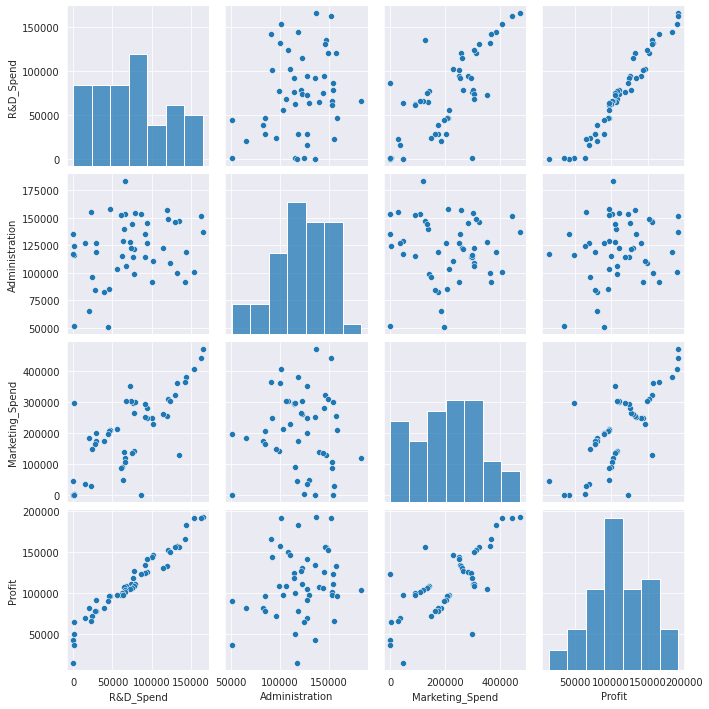

In [21]:
sns.set_style(style='darkgrid')
sns.pairplot(data_set)

In [40]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~Administration+Marketing_Spend+State+RnD_Spend',data=data_set).fit()

In [42]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
Administration          -0.027004
Marketing_Spend          0.026980
RnD_Spend                0.806023
dtype: float64

In [43]:
print(model.tvalues, '\n', model.pvalues)

Intercept             7.280560
State[T.Florida]      0.058970
State[T.New York]    -0.012864
Administration       -0.517012
Marketing_Spend       1.573889
RnD_Spend            17.368580
dtype: float64 
 Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
Administration       6.077373e-01
Marketing_Spend      1.226769e-01
RnD_Spend            2.578772e-21
dtype: float64


In [116]:
(model.rsquared,model.rsquared_adj, model.aic)

(0.9507524843355148, 0.945156175737278, 1062.764909597834)

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.34e-27
Time:                        13:34:32   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend       0.0270      0.017      1.574      0.123      -0.008       0.062
RnD_Spend             0.8060      0.046     17.369      0.000       0.712       0.900
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
# Model Validation
#Calculating VIF
r_sqr_rnd = smf.ols('RnD_Spend~Administration+Marketing_Spend', data=data_set).fit().rsquared
vif_r = 1 / (1-r_sqr_rnd)

r_sqr_adm = smf.ols('Administration~RnD_Spend+Marketing_Spend', data=data_set).fit().rsquared
vif_a = 1 / (1-r_sqr_adm)

r_sqr_mtk = smf.ols('Marketing_Spend~Administration+RnD_Spend', data=data_set).fit().rsquared
vif_m = 1 / (1-r_sqr_mtk)

d1={'Variables':['RnD_Spend', 'Administration','Marketing_Spend'],'VIF':[vif_r,vif_a,vif_m]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RnD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


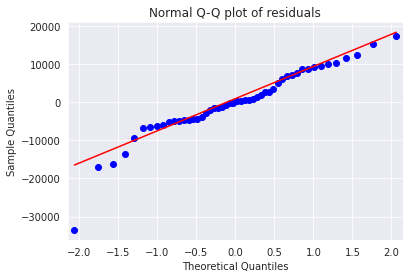

In [81]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [85]:
list(np.where(model.resid<-30000))

[array([49])]

In [88]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

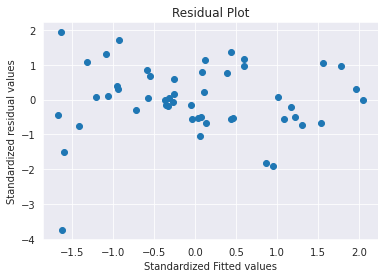

In [87]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

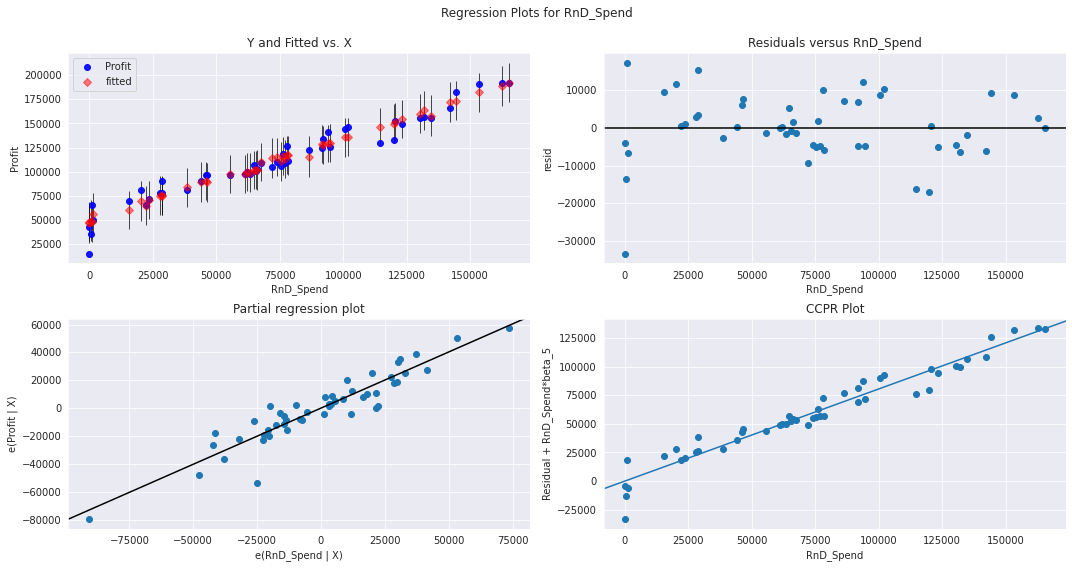

In [91]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RnD_Spend',fig=fig)
plt.show()

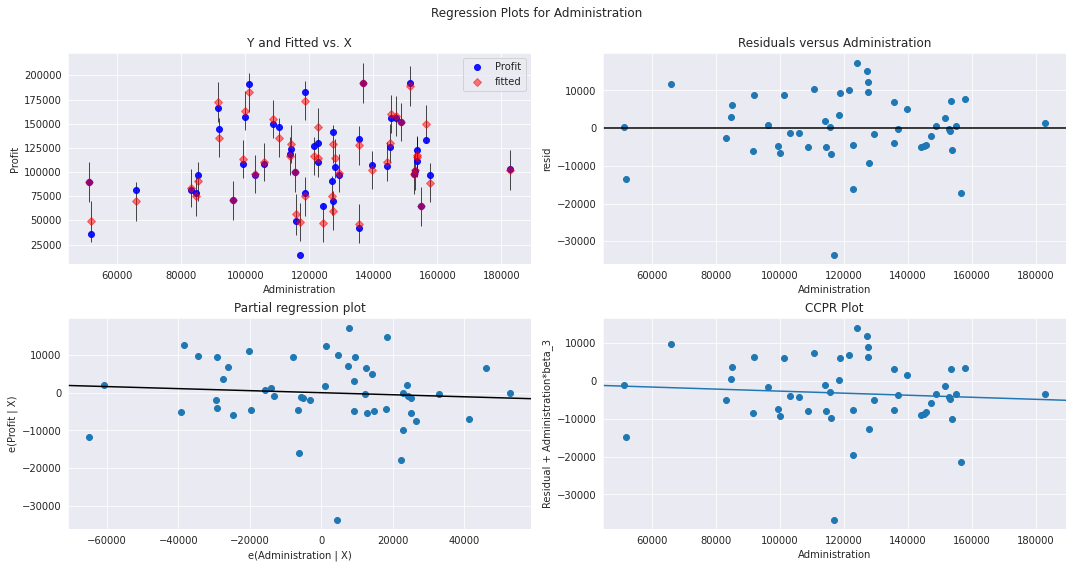

In [92]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

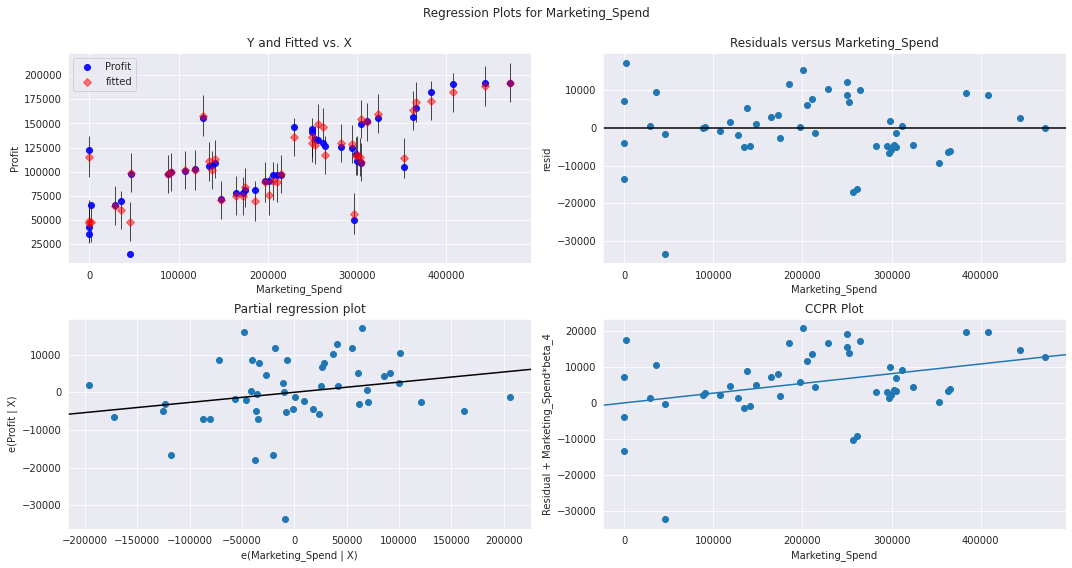

In [93]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Marketing_Spend',fig=fig)
plt.show()

In [94]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


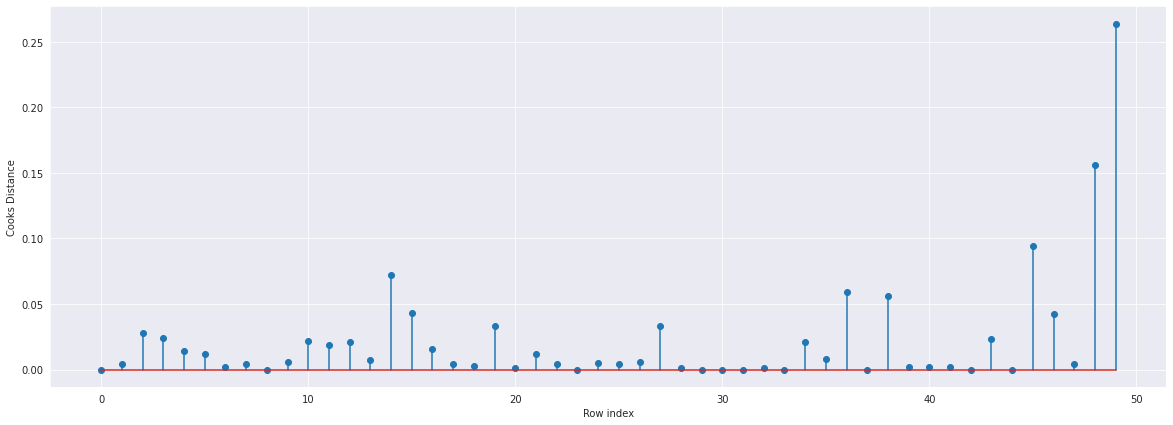

In [96]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_set)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [97]:
(np.argmax(c),np.max(c))

(49, 0.2639594358692022)

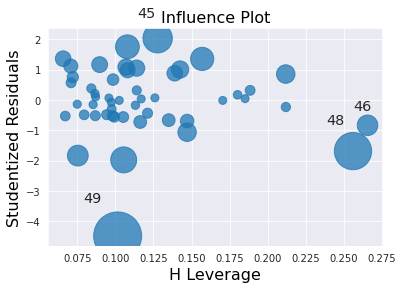

In [98]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [100]:
data_set.shape

(50, 5)

In [102]:
k = data_set.shape[1]
n = data_set.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [103]:
leverage_cutoff

0.36

In [104]:
data_set[data_set.index.isin([48,49])]

,RnD_Spend,Administration,Marketing_Spend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [106]:
data_set1=pd.read_csv('/content/50_Startups.csv',index_col=0)

In [107]:
Data1=data_set1.drop(data_set1.index[[48,49]],axis=0).reset_index()

In [109]:
Data1.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [112]:
Data1=Data1.rename(columns={'R&D Spend' : 'RDS', 'Marketing Spend' : 'MKT','Administration' : 'ADM'})

In [144]:
model1=smf.ols('Profit~RDS+ADM+MKT+RDS',data=Data1).fit()

In [145]:
(model1.rsquared,model1.aic)

(0.9603996030027453, 973.6784409946897)

In [146]:
model_influence = model1.get_influence()
(c_V, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


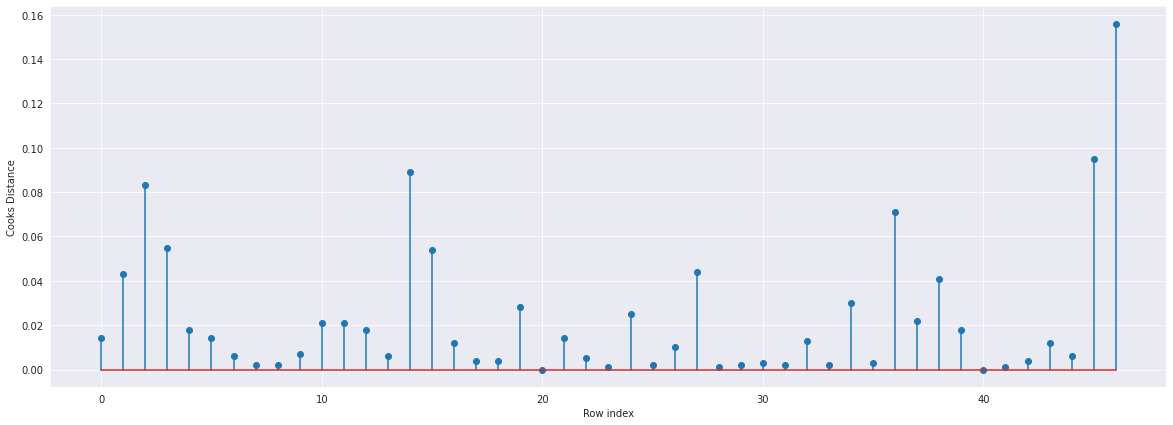

In [147]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Data1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [148]:
(np.argmax(c_V),np.max(c_V))

(46, 0.15573934954301832)

In [149]:
Data2=Data1.drop(Data1.index[46],axis=0)

In [150]:
Data2

,RDS,ADM,MKT,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [126]:
Data3=Data2.reset_index()

In [127]:
Data4=Data3.drop(['index'],axis=1)

In [128]:
Data4

,RDS,ADM,MKT,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [129]:
model2=smf.ols('Profit~ADM+MKT+State+RDS',data=Data4).fit()

In [131]:
model_influence_V = model2.get_influence()
(c_V, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


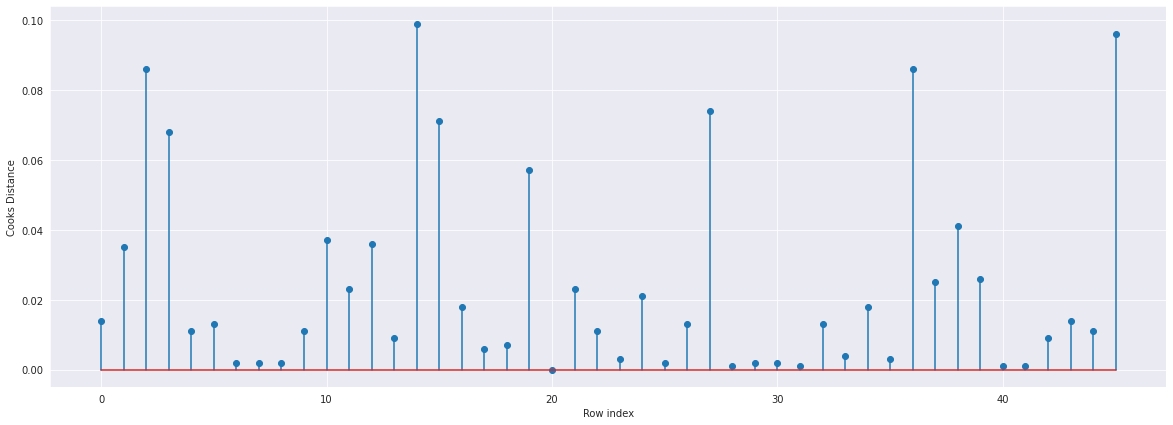

In [133]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Data4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [134]:
(np.argmax(c_V),np.max(c_V))

(14, 0.09899132138180775)

In [135]:
model2=smf.ols('Profit~ADM+MKT+State+RDS',data=Data4).fit()

In [136]:
model2.rsquared, model.rsquared_adj, model2.aic

(0.959068253250189, 0.945156175737278, 955.7859349494281)

In [137]:
final_data = pd.read_csv('/content/50_Startups.csv')

In [138]:
final_data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [139]:
final_data=final_data.drop("Profit", axis=1)

In [143]:
final_data.head(5)

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [154]:
final_data=final_data.rename(columns={'R&D Spend':'RDS', 'Administration':'ADM', 'Marketing Spend': 'MKT'})
final_data

,RDS,ADM,MKT,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [155]:
pred_data=model2.predict(final_data)

In [156]:
pred_data

0     188268.413733
1     185995.965039
2     179466.039310
3     171075.239480
4     170319.892220
5     161997.454200
6     157305.067012
7     157795.491875
8     149861.648990
9     154871.846868
10    135624.400554
11    137147.615175
12    129238.847896
13    128584.085265
14    147792.884724
15    145317.180275
16    118925.982026
17    129708.073376
18    129349.193219
19    116205.356007
20    118789.619497
21    117385.835863
22    115691.325624
23    111629.829550
24    115064.047475
25    104894.795208
26    111587.503456
27    115141.217944
28    102358.153439
29    103053.884589
30    101778.867062
31     99222.610109
32    102197.765369
33    100443.055390
34     91986.407009
35     93791.750826
36     78650.353860
37     94871.720444
38     74655.193078
39     88668.260645
40     79510.825558
41     79167.801816
42     76084.647030
43     64548.719636
44     69312.247847
45     52889.554415
46     60781.666098
47     52726.239607
48     55902.149364
49     54690.821075


In [157]:
final_data['Pred_profit']=pred_data

In [158]:
final_data

,RDS,ADM,MKT,State,Pred_profit
0,165349.20,136897.80,471784.10,New York,188268.413733
1,162597.70,151377.59,443898.53,California,185995.965039
2,153441.51,101145.55,407934.54,Florida,179466.039310
3,144372.41,118671.85,383199.62,New York,171075.239480
4,142107.34,91391.77,366168.42,Florida,170319.892220
5,131876.90,99814.71,362861.36,New York,161997.454200
6,134615.46,147198.87,127716.82,California,157305.067012
7,130298.13,145530.06,323876.68,Florida,157795.491875
8,120542.52,148718.95,311613.29,New York,149861.648990
9,123334.88,108679.17,304981.62,California,154871.846868
